# Assessment for Fundamentals of Data Analysis

The aim of this assessement is to review and interigate the tips data set using python and any packages - graphical and statistical to gain any insight into the data. The dataset is made up of customers attending a restuarnt over a number of days and all the information collected - Bill total, tip size, gender of the person paying the bill, wheather they were a smoker, the day/time of the week they attended and the number in their party. The second task was to determine wheather there is any relationship between the bill totals and the tips recieved by the servers - this analysis must take the form of a statiscal regression model.

In [3]:
# To begin we import all packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we then import the dataset - the file is located in the same folder as the Juptyer notebook
df = pd.read_csv("tips.csv")

Without any prior knowledge of the dataset we can use the below to get snippet of the first number of entries.

In [5]:
df.head() 

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The colums are made up of the 
1.***total_bill*** - total cost of the meal
2.***tip*** - tip recieved by the server
3.***sex*** - the gender of the person paying for the meal
4.***smoker*** - Wheather the customer was a smoker
5.***day*** - the day of the week the customer attended the restuarnt
6.***time*** - the time of the meal
7.***size*** - the size of the party
    
We know use the ***.info()*** function to determine what colums are made up of and wheather any values are missing. We have float, objects and interager values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


After insuring all the data is present we can now start to interigate the data. We can begin by using the ***.describe()* function. This can give us an insight into the mean bill total of \\$19.79  with a standard deviation of \\$8.90. The tips mean is \\$2.99  with a standard devaiation of $1.38.

In [9]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [41]:
print('******************************************')
print("Sex - Percentage Breakdown of the 244 entries")
print(df['sex'].value_counts(normalize=True) * 100)
print('******************************************')
print("Smoker - Percentage Breakdown of the 244 entries")
print(df['smoker'].value_counts(normalize=True) * 100)
print('******************************************')
print("Day - Percentage Breakdown of the 244 entries")
print(df['day'].value_counts(normalize=True) * 100)
print('******************************************')
print("Meal - Percentage Breakdown of the 244 entries")
print(df['time'].value_counts(normalize=True) * 100)
print('******************************************')
print("Party Size - Percentage Breakdown of the 244 entries")
print(df['size'].value_counts(normalize=True) * 100)
print('******************************************')

******************************************
Sex - Percentage Breakdown of the 244 entries
Male      64.344262
Female    35.655738
Name: sex, dtype: float64
******************************************
Smoker - Percentage Breakdown of the 244 entries
No     61.885246
Yes    38.114754
Name: smoker, dtype: float64
******************************************
Day - Percentage Breakdown of the 244 entries
Sat     35.655738
Sun     31.147541
Thur    25.409836
Fri      7.786885
Name: day, dtype: float64
******************************************
Meal - Percentage Breakdown of the 244 entries
Dinner    72.131148
Lunch     27.868852
Name: time, dtype: float64
******************************************
Party Size - Percentage Breakdown of the 244 entries
2    63.934426
3    15.573770
4    15.163934
5     2.049180
6     1.639344
1     1.639344
Name: size, dtype: float64
******************************************


In [10]:
print('*** Lunch breakdown ***')
print((df.loc[df.loc[:, 'time'] == 'Lunch']).describe())
print('*** Dinner breakdown ***')
print((df.loc[df.loc[:, 'time'] == 'Dinner']).describe())

*** Lunch breakdown ***
       total_bill        tip       size
count   68.000000  68.000000  68.000000
mean    17.168676   2.728088   2.411765
std      7.713882   1.205345   1.040024
min      7.510000   1.250000   1.000000
25%     12.235000   2.000000   2.000000
50%     15.965000   2.250000   2.000000
75%     19.532500   3.287500   2.000000
max     43.110000   6.700000   6.000000
*** Dinner breakdown ***
       total_bill         tip        size
count  176.000000  176.000000  176.000000
mean    20.797159    3.102670    2.630682
std      9.142029    1.436243    0.910241
min      3.070000    1.000000    1.000000
25%     14.437500    2.000000    2.000000
50%     18.390000    3.000000    2.000000
75%     25.282500    3.687500    3.000000
max     50.810000   10.000000    6.000000


In [11]:
df['total_spent'] = df['total_bill'] + df['tip']
df['tip_percentage(%)'] = round((df['tip'] / df['total_spent'])*100, 2)

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,total_spent,tip_percentage(%)
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00,5.61
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00,13.83
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51,14.28
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99,12.26
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20,12.80


In [14]:
group_size_breakdown = df.groupby(['size']).mean()
print(group_size_breakdown)

      total_bill       tip  total_spent  tip_percentage(%)
size                                                      
1       7.242500  1.437500     8.680000          17.590000
2      16.448013  2.582308    19.030321          13.976859
3      23.277632  3.393158    26.670789          13.072105
4      28.613514  4.135405    32.748919          12.622432
5      30.068000  4.028000    34.096000          12.152000
6      34.830000  5.225000    40.055000          13.422500


In [15]:
day_time_sex = df.groupby(['day', 'time', 'sex'])['tip_percentage(%)'].mean()
print("**** day_time_sex tip_percentage(%) ****")
print(day_time_sex)

**** day_time_sex tip_percentage(%) ****
day   time    sex   
Fri   Dinner  Female    16.506000
              Male      11.498571
      Lunch   Female    16.565000
              Male      14.713333
Sat   Dinner  Female    13.310357
              Male      13.020339
Sun   Dinner  Female    15.099444
              Male      13.579828
Thur  Dinner  Female    13.770000
      Lunch   Female    13.542258
              Male      14.055333
Name: tip_percentage(%), dtype: float64


In [59]:
print("" + str(round(df['total_bill'].mean(),2)))
print("" + str(round(df['tip'].mean(),2)))
print("" + str(round(df['tip_percentage(%)'].mean(),2)))

19.79
3.0
13.64


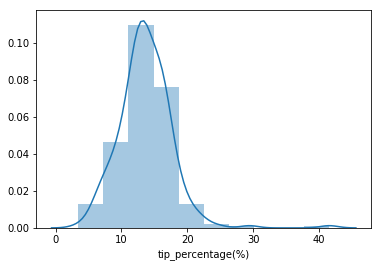

In [16]:
sns.distplot(df['tip_percentage(%)'], bins=10);

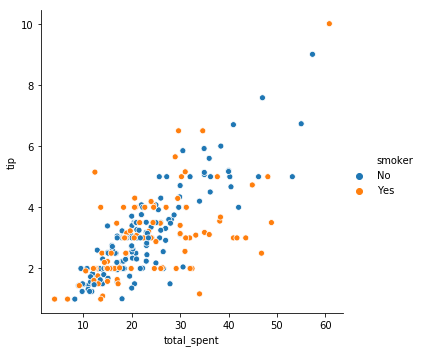

In [17]:
sns.relplot(x='total_spent', y='tip', hue="smoker", data=df)

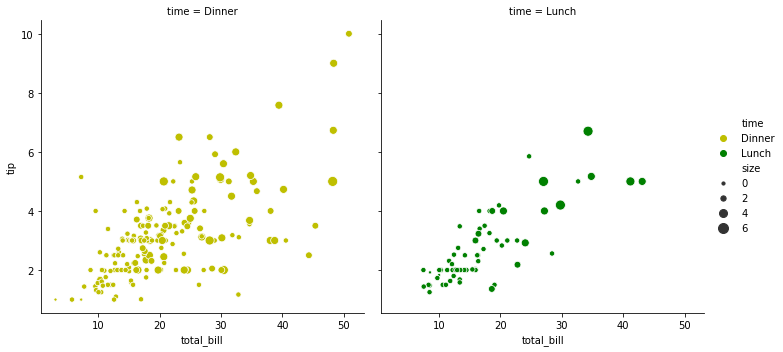

In [18]:
 g = sns.relplot(x="total_bill", y="tip", hue="time", size="size",palette=["y", "g"], sizes=(10, 100),col="time", data=df)

In [19]:
df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

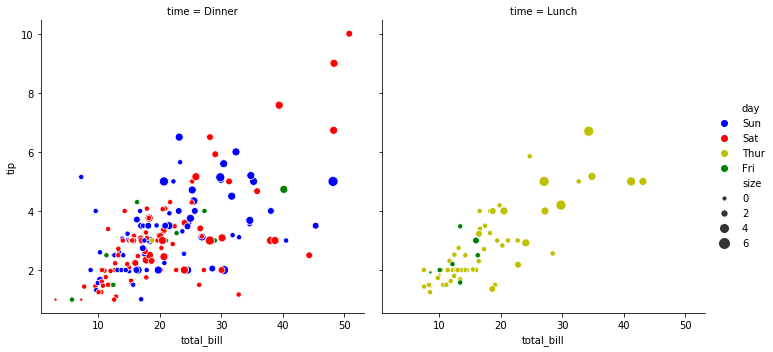

In [20]:
 g = sns.relplot(x="total_bill", y="tip", hue="day", size="size",palette=["b", "r", "y", "g"], sizes=(10, 100),col="time", data=df)

In [21]:
meal_times = df.groupby(['day','time']).size()
print(meal_times)

day   time  
Fri   Dinner    12
      Lunch      7
Sat   Dinner    87
Sun   Dinner    76
Thur  Dinner     1
      Lunch     61
dtype: int64


In [22]:
day_time_smoker= df.groupby(['day', 'time', 'smoker'])['tip_percentage(%)'].mean()
print("**** day_time_smoker tip_percentage(%) ****")
print(day_time_smoker)

**** day_time_smoker tip_percentage(%) ****
day   time    smoker
Fri   Dinner  No        12.236667
              Yes       14.034444
      Lunch   No        15.810000
              Yes       15.765000
Sat   Dinner  No        13.549778
              Yes       12.646429
Sun   Dinner  No        13.687719
              Yes       14.695789
Thur  Dinner  No        13.770000
      Lunch   No        13.720227
              Yes       13.987059
Name: tip_percentage(%), dtype: float64


In [43]:
day_time_sex_smoker= df.groupby(['day', 'time', 'sex', 'smoker'])['tip_percentage(%)'].mean()
print("**** day_time_sex_smoker tip_percentage(%) ****")
print(day_time_sex_smoker)

**** day_time_sex_smoker tip_percentage(%) ****
day   time    sex     smoker
Fri   Dinner  Female  No        12.500000
                      Yes       17.507500
              Male    No        12.105000
                      Yes       11.256000
      Lunch   Female  No        15.810000
                      Yes       16.816667
              Male    Yes       14.713333
Sat   Dinner  Female  No        12.804615
                      Yes       13.748667
              Male    No        13.852500
                      Yes       12.034074
Sun   Dinner  Female  No        14.088571
                      Yes       18.637500
              Male    No        13.557209
                      Yes       13.644667
Thur  Dinner  Female  No        13.770000
      Lunch   Female  No        13.418333
                      Yes       13.967143
              Male    No        14.082500
                      Yes       14.001000
Name: tip_percentage(%), dtype: float64


Regression

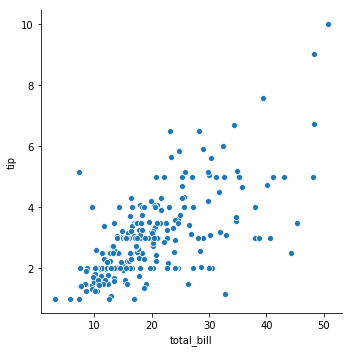

In [24]:
sns.relplot(x='total_bill', y='tip', data=df)

# Regression

As part of this assigment, one of the tasks was to investigate wheather there is a relationship between the total bill and tip. We can do this in many different ways plotting the data or performing calculations.

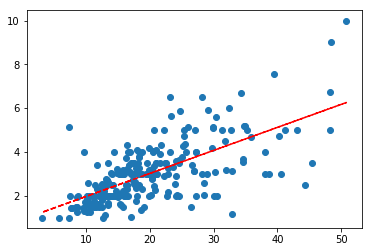

In [25]:
# The below example was adapted from the following link
# https://stackoverflow.com/questions/41635448/how-can-i-draw-scatter-trend-line-on-matplot-python-pandas/41635626

x=df['total_bill']
y=df['tip']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.scatter(x, y)
plt.plot(x,p(x), 'r--')

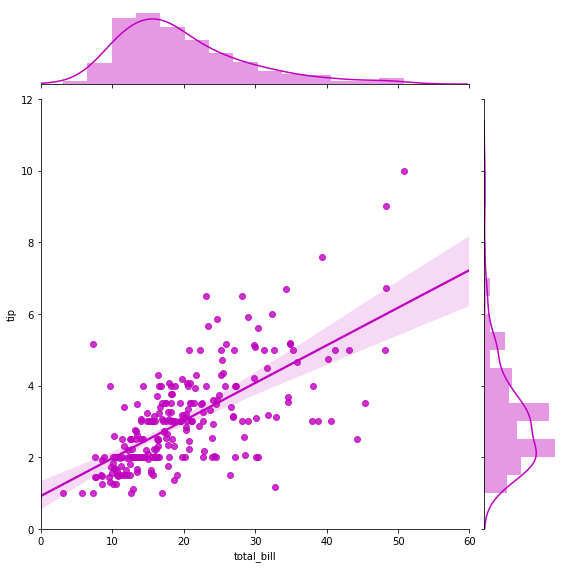

In [64]:
g = sns.jointplot("total_bill", "tip", data=df, kind="reg",
                  xlim=(0, 60), ylim=(0, 12), color="m", height=8)

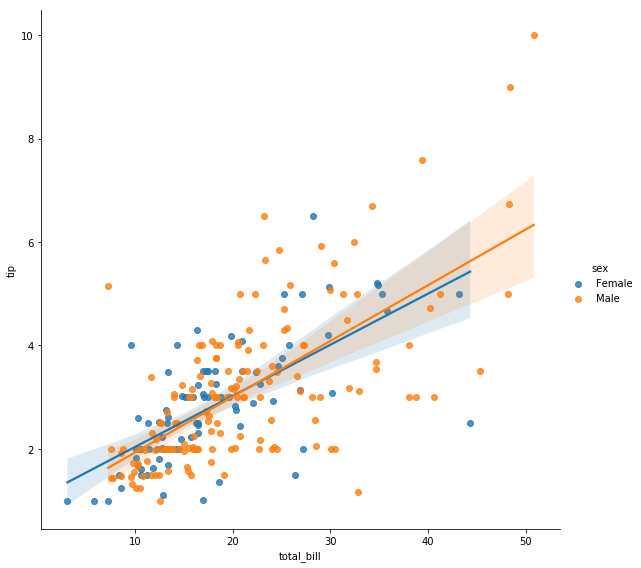

In [62]:
g = sns.lmplot(x="total_bill", y="tip", hue="sex", truncate=True, height=8, data=df)

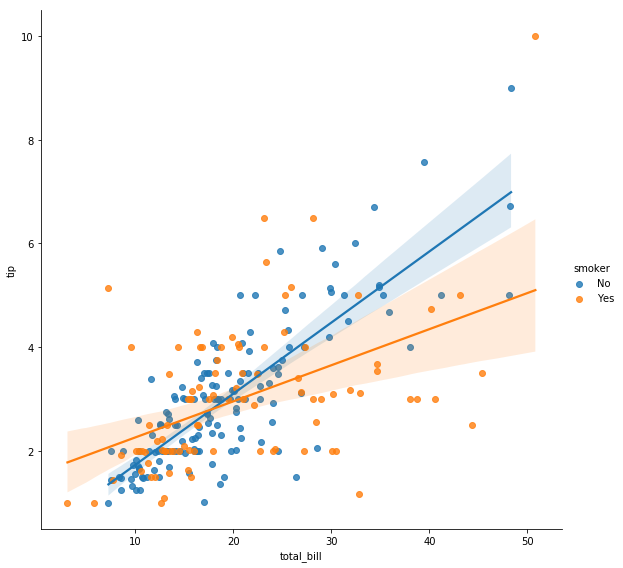

In [63]:
g = sns.lmplot(x="total_bill", y="tip", hue="smoker", truncate=True, height=8, data=df)

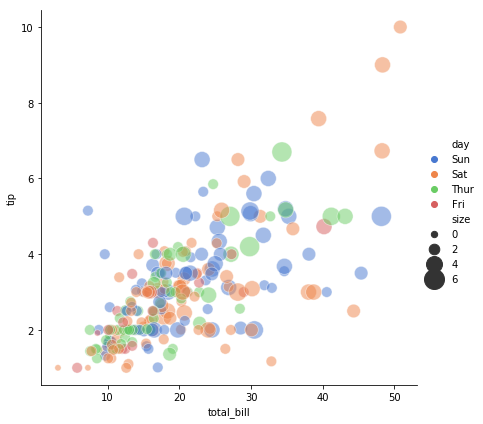

In [52]:
sns.relplot(x="total_bill", y="tip", hue="day", size="size",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)

# References

1. https://stackoverflow.com/questions/50558458/pandas-percentage-by-value-in-a-column
2. https://seaborn.pydata.org/examples/scatter_bubbles.html
3. https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
4. https://seaborn.pydata.org/
5. https://matplotlib.org/
6. https://www.youtube.com/watch?v=A2XyVNXx7y8&t=17s
7. https://www.youtube.com/watch?v=ZkjP5RJLQF4
8. https://www.dictionary.com/browse/regression
9. https://www.kaggle.com/saurav9786/data-visualization-tutorial